AAI 5005 Graphs and Network Analysis  
Homework #2: Scale-free network models  
November 3, 2022  
Due date: November 14, 2022 (23:59)  

Department : Biomedical Systems Informatics  
Name : Suncheolheo  
Student id : 2021321629  
Submission Date : 2022-11-14  
(Discussion mate : lee joohyun) 


In this homework, you are asked to generate unweighted undirected networks based on different models.   
By default, set the number of nodes as 𝑛=10000. But if that is too much on your machine, you can change it to a smaller (but still sufficiently large) value.  
For other parameters (𝑐, 𝑝, 𝜆), try (two or more) different values and examine how the results change.  


**1. Preferential attachment**  
**1.1. Original Barabasi-Albert (BA) model**  
Generate a network having 𝑛 nodes using the BA model as follows:  
    - Start with a complete graph with 𝑛%  nodes (choose an appropriate value for 𝑛%, e.g., 10).  
    - Add a node at a time with 𝑐  edges connecting it and existing nodes based on the preferential attachment mechanism.   
    Do NOT use an existing function. Write your own code.  
    Examine  the  degree  distribution,  and  estimate the  exponent  of  the  power-law  distribution  via maximum likelihood maximization. Examine the clustering coefficient and diameter (or shortest path distances between node pairs). Compare the results to the theoretically expected results. If you observe any discrepancy between the theoretical and obtained values, analyze possible reasons.  

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [55]:
def summary_of_graph(G):
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())
    print("Average degree: ", np.mean(list(dict(G.degree()).values())))
    print("Average clustering coefficient: ", nx.average_clustering(G))
    print("Average shortest path length: ", nx.average_shortest_path_length(G))
    
def plot_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=100, log=True)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()

def plot_clustering_coefficient_distribution(G):
    clustering_coefficients = nx.clustering(G)
    plt.hist(clustering_coefficients.values(), bins=100, log=True)
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Frequency')
    plt.title('Clustering Coefficient Distribution')
    plt.show()
    
def save_figure(G, name):
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=False, node_size=100)
    plt.axis('off')
    plt.savefig(name, dpi=300)
    plt.show()

In [24]:
def barabasi_albert_graph(n, m, seed=None):
    '''
    1.1 barabasi albert graph 
    n : the number of nodes
    m : the number of edges to attach from a new node to existing nodes
    seed : random seed
    '''
    
    if seed is not None:
        np.random.seed(seed)
        
    # Start with a complete graph with 𝑛%  nodes (choose an appropriate value for 𝑛%, e.g., 10). 
    init_nodes = int(n * 0.01)
    G = nx.complete_graph(init_nodes)
    
    # Add a node at a time with 𝑐  edges connecting it and existing nodes based on the preferential attachment mechanism
    for i in range(init_nodes, n):
        G.add_node(i)
        # preferential attachment mechanism
        nodes = list(G.nodes())
        # choose 𝑐 nodes with probability proportional to their degree
        degrees = list(dict(G.degree()).values())
        probs = degrees / np.sum(degrees)
        chosen_nodes = np.random.choice(nodes, int((m+1)/2), replace=False, p=probs)
        for node in chosen_nodes:
            G.add_edge(i, node)
        
    return G

n = 4039
m = 43
seed = 0
BA_G = barabasi_albert_graph(n, m, seed)

In [25]:
summary_of_graph(BA_G)

Number of nodes:  4039
Number of edges:  88758
Average degree:  43.95048279277049
Average clustering coefficient:  0.0454189094153886
Average shortest path length:  2.4883143437664055


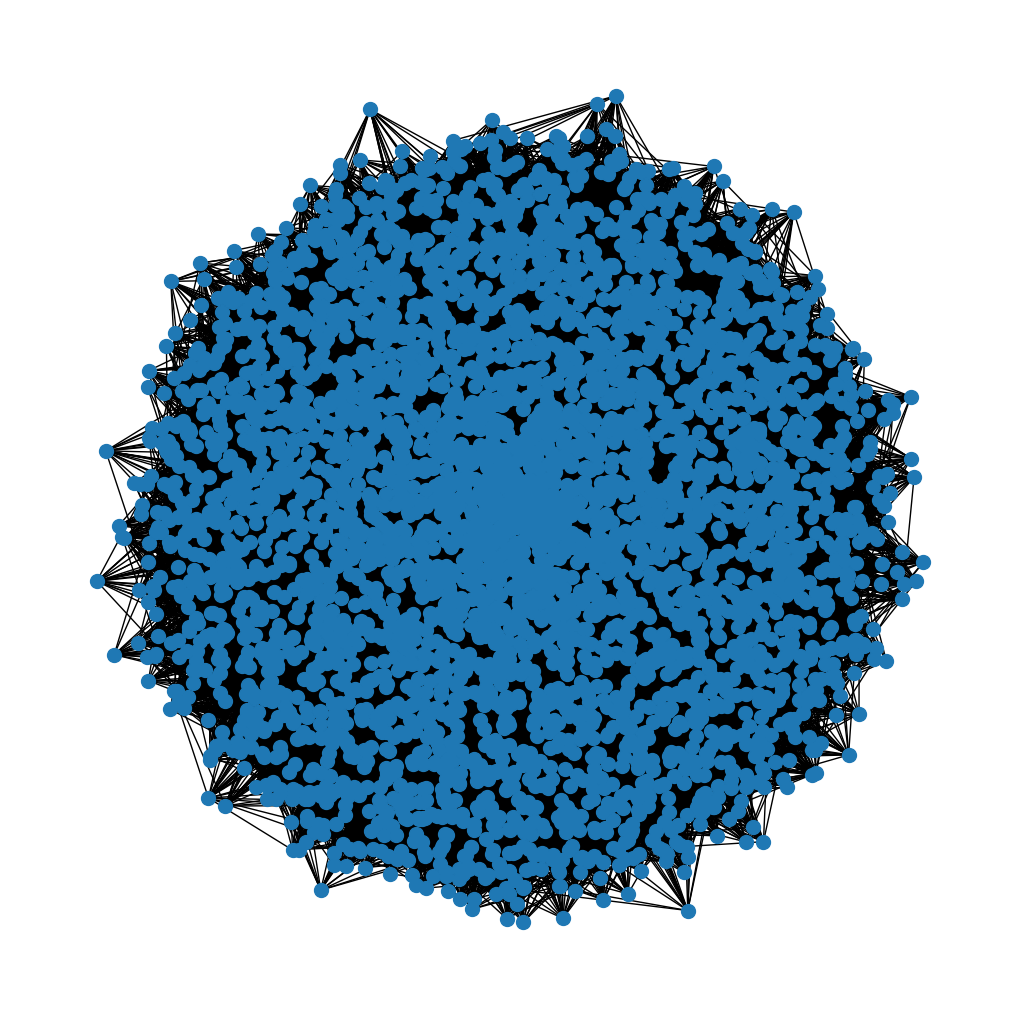

In [30]:
save_figure(BA_G, f"BA_G_{n}_{m}.png")

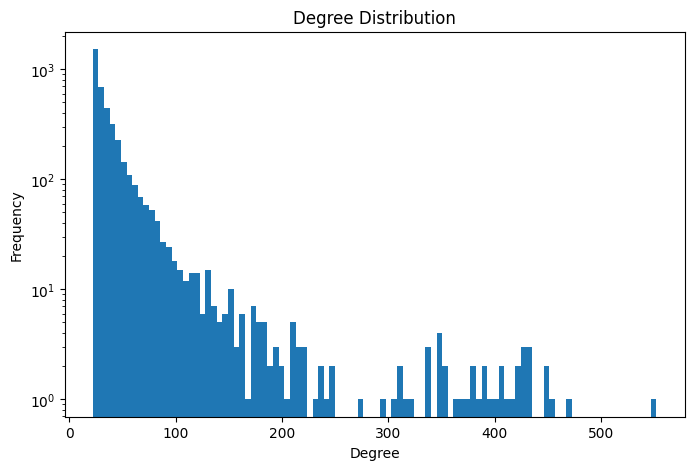

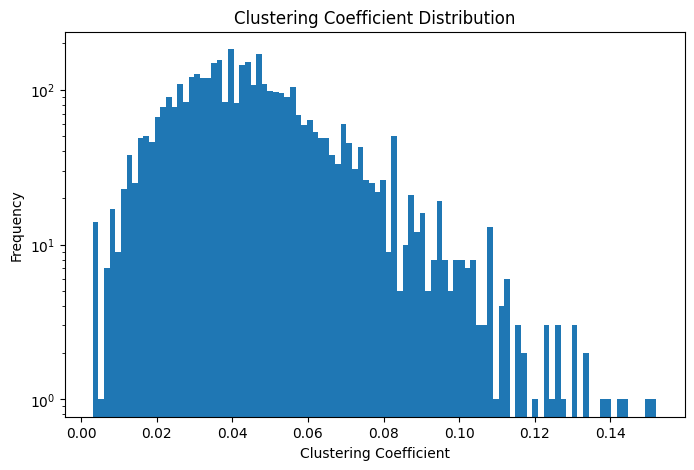

In [58]:
fig = plt.figure(figsize=(8, 5))
plot_degree_distribution(BA_G)
fig.savefig("BA degree distribution.png", dpi=300) # save as png
plt.show()

fig = plt.figure(figsize=(8, 5))
plot_clustering_coefficient_distribution(BA_G)
fig.savefig("BA clustering coefficient distribution.png", dpi=300) # save as png
plt.show()

**1.2. Modified BA model**
    The clustering coefficient of the original BA model is usually too low compared to the clustering coefficients of real-world networks. To overcome this limitation, come up with an idea of your own to slightly modify the preferential attachment mechanism, while other properties like the power-law degree distribution and small-world property remain as similar as possible.  
    Implement your idea and demonstrate if it works well.   
    As a side effect, the degree distribution and/or diameter may become deviated from those of the original model. Examine how much the deviations are, and discuss why.  

In [41]:
def modified_barabasi_albert_graph(n, m, seed=None):
    '''
    1.2 modified barabasi albert graph 
    n : the number of nodes
    m : the number of edges to attach from a new node to existing nodes
    seed : random seed
    '''
    
    if seed is not None:
        np.random.seed(seed)
        
    # Start with a complete graph with 𝑛%  nodes (choose an appropriate value for 𝑛%, e.g., 10). 
    init_nodes = int(n * 0.01)
    G = nx.complete_graph(init_nodes)
    
    # Add a node at a time with 𝑐  edges connecting it and existing nodes based on the preferential attachment mechanism
    for i in range(init_nodes, n):
        G.add_node(i)
        # preferential attachment mechanism with modification
        nodes = list(G.nodes())
        degrees = list(dict(G.degree()).values())
        probs = degrees / np.sum(degrees)
        
        # make locality of nodes 
        chosen_nodes = np.random.choice(nodes, 1, replace=False, p=probs)
        for node in chosen_nodes:
            G.add_edge(i, node)
            neighbors = list(G.neighbors(node))
            neighbor_degrees = [G.degree(n) for n in neighbors]
            neighbor_probs = neighbor_degrees / np.sum(neighbor_degrees)
            chosen_neighbor_nodes = np.random.choice(neighbors, int((m-1)/2), replace=False, p=neighbor_probs)
            for neighbor_node in chosen_neighbor_nodes:
                if i != neighbor_node:
                    G.add_edge(i, neighbor_node)

    return G


In [42]:
modified_BA_G = modified_barabasi_albert_graph(n, m, seed)
summary_of_graph(modified_BA_G)


Number of nodes:  4039
Number of edges:  88691
Average degree:  43.91730626392671
Average clustering coefficient:  0.5276126214277411
Average shortest path length:  1.9926695403324275


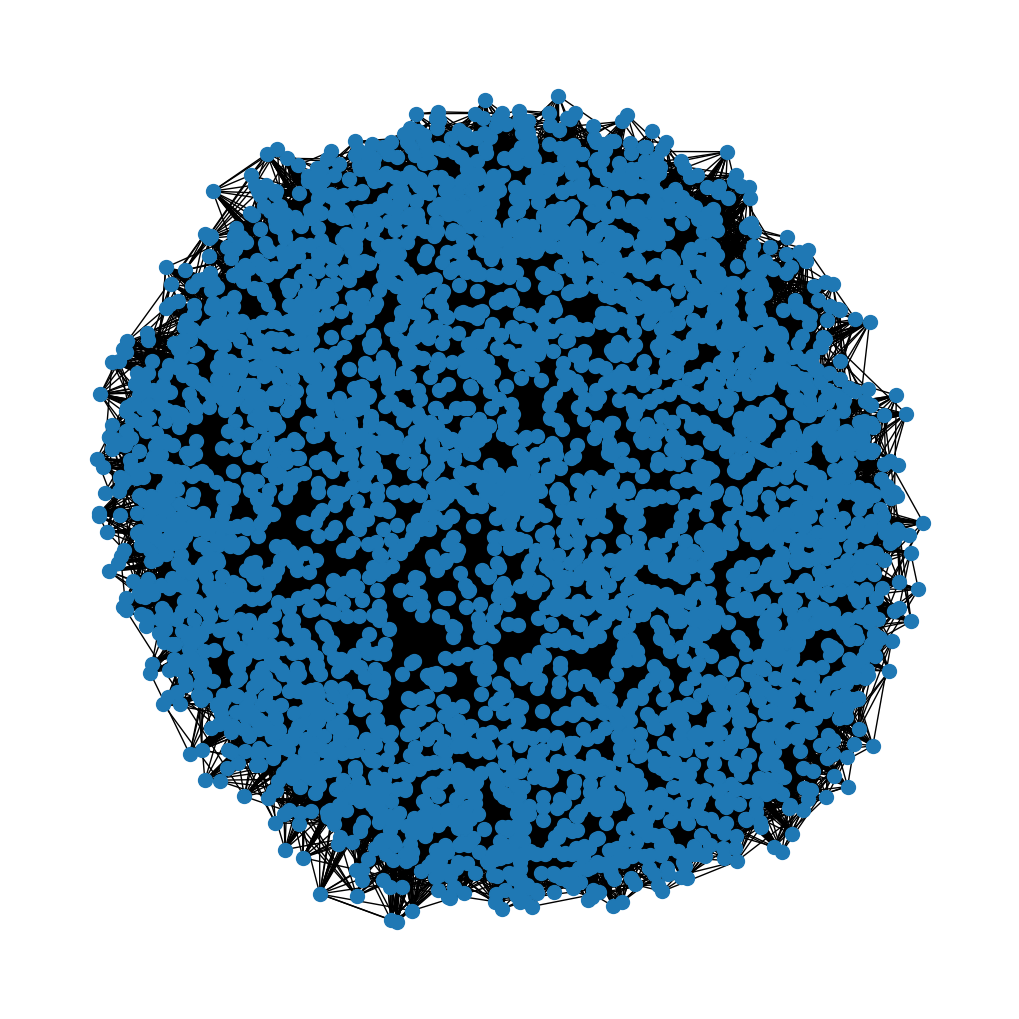

In [46]:
save_figure(modified_BA_G, f"modified_BA_G_{n}_{m}.png")

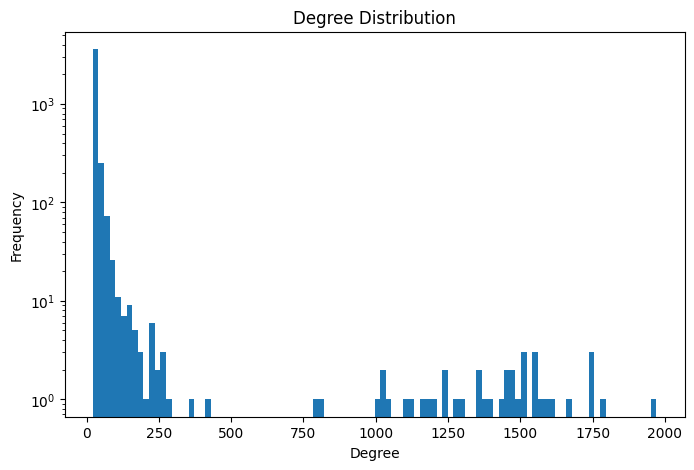

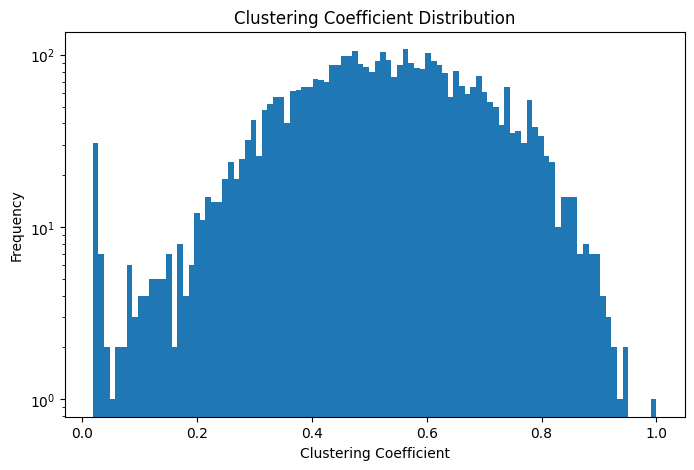

In [59]:
fig = plt.figure(figsize=(8, 5))
plot_degree_distribution(modified_BA_G)
fig.savefig("modified_BA_G degree distribution.png", dpi=300) # save as png
plt.show()

fig = plt.figure(figsize=(8, 5))
plot_clustering_coefficient_distribution(modified_BA_G)
fig.savefig("modified_BA_G clustering coefficient distribution.png", dpi=300) # save as png
plt.show()

In [45]:
global_clustering_coefficients = nx.average_clustering(modified_BA_G)
print("Global clustering coefficient: ", global_clustering_coefficients)

Global clustering coefficient:  0.5276126214277411


**2. Optimization model**  
Generate a network having 𝑛 nodes via minimization of the objective function given by 
𝐿 = 𝜆𝑚 + (1 − 𝜆)𝑙
where 𝑚 is the number of edges, 𝑙 is the diameter, and 𝜆 is the balancing parameter: 
- First, generate an Erdos-Renyi random network having 𝑛 nodes with edge probability 𝑝 . Ensure that one component includes all nodes. In doing so, the resulting edge probability may become slightly different from 𝑝, which is fine. 
- Then, modify the network by repeating the following process for a sufficient number of iterations: Choose two nodes randomly. Examine the objective function under the change of the connection status of the two nodes (i.e., add an edge between them if they are disconnected; remove the edge if they are connected). If the objective function decreases by the change, accept the change.  
You need to consider that 𝑚 and 𝑙 have different scales when setting the value of 𝜆. Examine how the network structure changes according to 𝜆. Explain why. 
Obtain a power-law network by adjusting 𝜆 (and 𝑝 if needed). Compare it to the networks obtained in Section 1 in various aspects, and discuss similarities and dissimilarities.

In [61]:
n = 4000
p = 0.1
"""
2) First, generate an Erdos-Renyi random network having 𝑛 nodes with edge
probability 𝑝 . Ensure that one component includes all nodes. 
In doing so, the resulting edge probability may become slightly 
different from 𝑝, which is fine.
"""
ER_G = nx.erdos_renyi_graph(n, p, seed=0)

# Ensure that one component includes all nodes
print("count of component when p = 0.2", nx.number_connected_components(ER_G))

# p = 0.0023
# ER_G = nx.erdos_renyi_graph(n, p, seed=0)
# print("count of component when p = 0.0023", nx.number_connected_components(ER_G))

"""
2) define objective function
𝐿 = 𝜆𝑚 + (1 − 𝜆)𝑙 
(𝑚 : number of edges, 𝑙 : diameter, 𝜆 : balancing parameter)
"""
def objective_function(G, _lambda):
    m = G.number_of_edges()
    l = nx.diameter(G)
    return _lambda * m + (1 - _lambda) * l

"""
3) Then, modify the network by repeating the following process for a sufficient
number of iterations: Choose two nodes randomly. 
Examine the objective function under the change of the connection status of 
the two nodes (i.e., add an edge between them if they are disconnected; 
remove the edge if they are connected). If the objective function decreases 
by the change, accept the change.  
"""
def modified_graph(G, two_nodes):
    if(G.has_edge(two_nodes[0], two_nodes[1])):
        G.remove_edge(two_nodes[0], two_nodes[1])
    else:
        G.add_edge(two_nodes[0], two_nodes[1])
    return G    

def get_modified_graph_with_objective_function(G, _lambda, objective_function):
    obj = objective_function(G, _lambda)
    count = 0
    stop_count = 10000
    while True:
        two_nodes = random.sample(list(G.nodes()), 2)
        modified_G = modified_graph(G, two_nodes)
        modified_obj = objective_function(modified_G, _lambda)
        
        if modified_obj < obj:
            G = modified_G
            obj = modified_obj
            count = 0
        else:
            count += 1
        # print("modified obj: ", modified_obj, obj, " count : ", count)
        if count == stop_count:
            break
    return G

_lambdas = [0.1, 0.5, 0.9]
_graphs = []
_diameters = []
_edges = []
for _lambda in _lambdas:
    print("lambda : ", _lambda)
    G = get_modified_graph_with_objective_function(ER_G.copy(), _lambda, objective_function)
    _graphs.append(G)
    _diameters.append(nx.diameter(G))
    _edges.append(G.number_of_edges())
    
import pandas as pd
df = pd.DataFrame({"lambda" : _lambdas, "diameter" : _diameters, "edges" : _edges})
print(df)

count of component when p = 0.2 1
lambda :  0.1


In [ ]:
df

,lambda,diameter,edges
0,0.1,2,2452
1,0.5,2,2457
2,0.9,2,2516


In [91]:
df.to_csv("result.csv")

In [92]:
"""
4) You need to consider that 𝑚 and 𝑙 have different scales when setting 
the value of 𝜆. Examine how the network structure changes according to 𝜆. 
Explain why.
"""
for _lambda, G in zip(_lambdas, _graphs):
    print("lambda : ", _lambda)
    print("diameter : ", nx.diameter(G))
    print("edges : ", G.number_of_edges())
    print("avg path length : ", nx.average_shortest_path_length(G))
    print("avg clustering : ", nx.average_clustering(G))
    print("avg degree : ", sum(dict(G.degree()).values())/len(dict(G.degree()).values()))
    

lambda :  0.1
diameter :  2
edges :  2516
avg path length :  1.4917171717171718
avg clustering :  0.5070385750126526
avg degree :  50.32
lambda :  0.5
diameter :  2
edges :  2516
avg path length :  1.4917171717171718
avg clustering :  0.5070385750126526
avg degree :  50.32
lambda :  0.9
diameter :  2
edges :  2516
avg path length :  1.4917171717171718
avg clustering :  0.5070385750126526
avg degree :  50.32


  
* Items to be submitted  
  - Report in pdf (specify the software environment)  
  - Zip file including the source code (.py, .ipynb, .m, .c, .cpp, …), data files, etc. 
  - Do not include your report in the zip file. Submit the report separately.  


* Tips
  - Rich discussion and analysis, and various efforts matter the most in grading.
  - Do not make a cover page.
  - Do not use powerpoint styles.
  - Do not put screenshots except for code and figures.
  - Figures and tables must be explained in the text.
  - Every figure must have an appropriate label on each axis.
  - You don’t need to explain your code line-by-line.
  - Consider significant figures when presenting numerical results.
  - Specify with whom you had discussion, if you did.